### AutoML Model-Building
- Objectives: 
    - This notebook builds an autoML pipeline to predict Indian rice yields

In [88]:
# Import modules
import pandas as pd
import matplotlib as plt
import pycaret
from pycaret.regression import *

In [77]:
# Read yield and NDVI/weather data 
processed_weather_yield_df = pd.read_excel('C:\\Users\\djava\\OneDrive\\Documents\\Oxford\\Projects\\india_rice_early_warning\\4_data\\PROCESSED_DATA\\ANALYSIS_READY\\india_yield_weather_ndvi.xlsx')

In [82]:
# filter out data that is 2021 using query
processed_weather_yield_df = processed_weather_yield_df.query('year != 2021')

In [84]:
# Sort data by year ascending for train test split
processed_weather_yield_df = processed_weather_yield_df.sort_values(by='year', ascending=True).copy()

In [85]:
# Drop District, State, Season, Area_ha, Production_t
processed_weather_yield_df.drop(['District', 'State', 'Season', 'Area_ha', 'Production_t'], axis=1, inplace=True)

In [86]:
processed_weather_yield_df

,GID_2,year,Yield_t_ha,t2m_5,t2m_6,t2m_7,t2m_8,t2m_9,t2m_10,t2m_11,...,tp_9,tp_10,tp_11,NDVI_5,NDVI_6,NDVI_7,NDVI_8,NDVI_9,NDVI_10,NDVI_11
0,IND.11.12_1,2001,2.250000,33.147400,30.777649,27.703522,27.983978,29.930847,28.725311,24.314117,...,0.000360,0.001253,0.000000,0.353912,0.326378,0.405922,0.609368,0.561315,0.473015,0.401144
3050,IND.3.7_1,2001,0.974964,22.159607,23.933298,24.242014,24.394928,23.320566,20.645721,16.586721,...,0.008354,0.006311,0.000820,0.594013,0.611878,0.670610,0.661715,0.682415,0.640776,0.640321
480,IND.12.7_1,2001,1.515335,33.160076,31.343637,30.122528,30.406616,30.639963,26.643646,20.007273,...,0.000710,0.000239,0.000037,0.166207,0.226323,0.457899,0.449664,0.371510,0.276104,0.234665
3088,IND.30.3_1,2001,1.429167,19.127869,20.736664,21.168213,20.922546,19.737671,17.179871,13.860077,...,0.010831,0.009618,0.008813,0.611862,0.706626,0.788891,0.808338,0.822498,0.794624,0.718623
3108,IND.33.1_1,2001,1.992542,26.435478,26.664841,27.216789,28.038857,27.176018,26.070229,22.969452,...,0.006700,0.008833,0.000968,0.672989,0.710111,0.827761,0.806971,0.855425,0.842053,0.816963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,IND.20.27_1,2020,1.933797,29.667353,27.186295,26.548853,25.737604,26.552555,26.776913,25.906199,...,0.015428,0.007264,0.000078,0.407388,0.511693,0.483261,0.818790,0.829861,0.776244,0.655734
2849,IND.3.12_1,2020,1.998679,21.046295,23.058945,23.703384,25.250788,23.886190,22.872162,17.249090,...,0.017375,0.006538,0.001878,0.727812,0.788743,0.828017,0.847567,0.850859,0.844262,0.809586
99,IND.11.23_1,2020,1.758799,34.856220,30.727428,29.758001,27.661108,29.332539,28.841206,24.378687,...,0.003027,0.000548,0.000008,0.351054,0.422587,0.575896,0.708334,0.716762,0.649666,0.563575
1259,IND.2.4_1,2020,3.985336,33.564568,31.528044,29.256304,28.653496,28.609760,28.094255,26.132399,...,0.012476,0.007602,0.004340,0.324449,0.336075,0.484333,0.538435,0.616640,0.689880,0.667639


In [87]:
# Split data into train and test set
train = dataset.query('year < 2019')
test  = dataset.query('year >= 2019')

# Print shape of train and test set
print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

Data for Modeling: (4606, 24)
Unseen Data For Predictions: (514, 24)


In [89]:
# import pycaret regression and initialize setup
s = setup(data = train,
          test_data=test,
          # fold_strategy = 'timeseries',
          target = 'Yield_t_ha',
          data_split_shuffle = False,
          # group_features = ['GID_2'],
          session_id = 123
          # ignore_features = ['year']
          )

,Description,Value
0,Session id,123
1,Target,Yield_t_ha
2,Target type,Regression
3,Original data shape,"(5120, 24)"
4,Transformed data shape,"(5120, 24)"
5,Transformed train set shape,"(4606, 24)"
6,Transformed test set shape,"(514, 24)"
7,Numeric features,22
8,Categorical features,1
9,Rows with missing values,6.0%


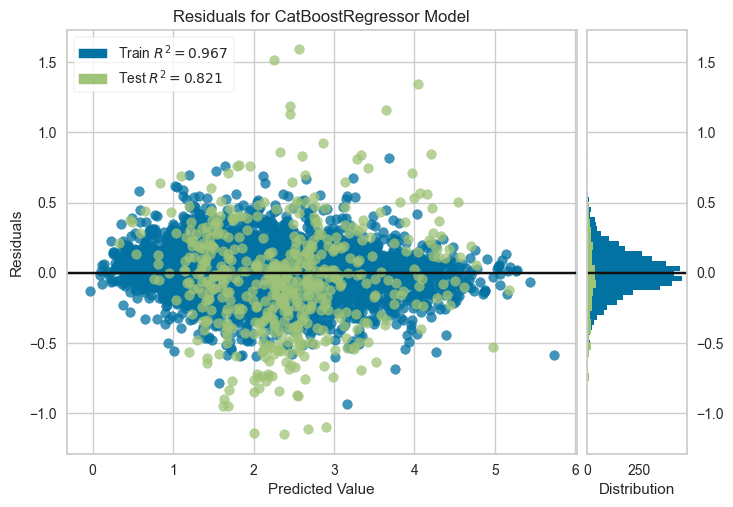

In [70]:
# plot residuals
plot_model(best, plot = 'residuals')

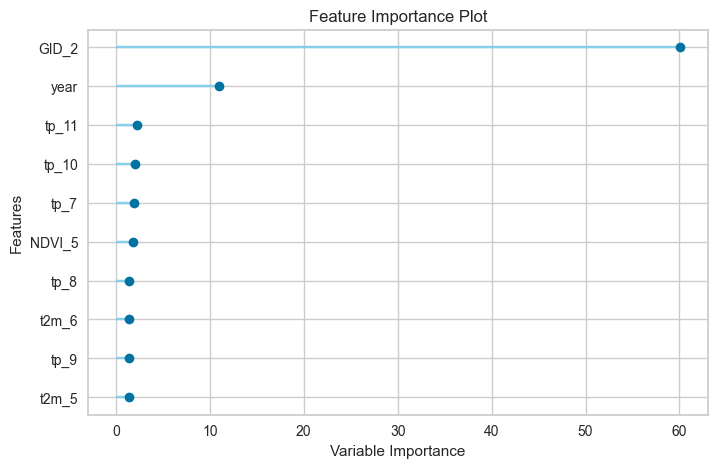

In [71]:
# plot feature importance
plot_model(best, plot = 'feature')

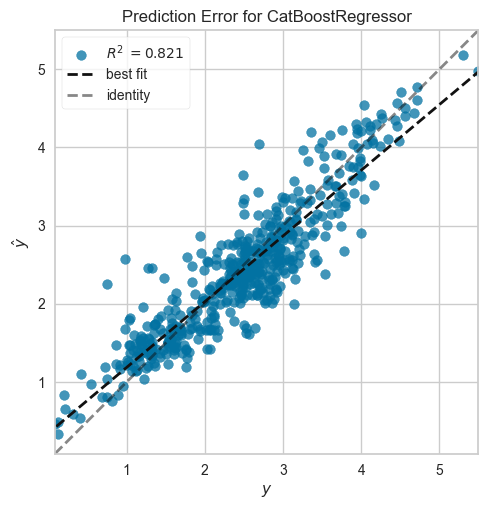

In [72]:
plot_model(best, plot = 'error')

In [73]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2954,0.1531,0.3913,0.8213,0.1248,0.1705


In [75]:
# show predictions df
holdout_pred

,GID_2,year,t2m_5,t2m_6,t2m_7,t2m_8,t2m_9,t2m_10,t2m_11,tp_5,...,tp_11,NDVI_5,NDVI_6,NDVI_7,NDVI_8,NDVI_9,NDVI_10,NDVI_11,Yield_t_ha,prediction_label
358,IND.12.20_1,2019,32.381584,34.283073,30.964897,30.101776,29.428642,25.943604,20.714119,0.000381,...,0.001000,0.210044,0.213529,0.499603,0.687992,0.673750,0.559333,0.334183,2.907408,2.813393
238,IND.12.11_1,2019,31.845856,33.713379,29.974325,29.731201,28.874247,24.748932,19.843842,0.000448,...,0.000702,0.260111,0.241452,0.724184,0.809734,0.743859,0.455081,0.358215,3.495798,4.065466
4958,IND.7.18_1,2019,35.509998,32.903126,27.911600,27.054081,27.281424,26.306662,23.518568,0.000144,...,0.000017,0.322771,0.316102,0.573007,0.653331,0.807722,0.767004,0.592513,1.254591,1.711284
4978,IND.7.21_1,2019,34.502743,32.356331,27.465149,27.005230,26.922419,25.662830,22.797401,0.000154,...,0.000012,0.328517,0.336558,0.575798,0.644161,0.783779,0.753359,0.640188,1.651617,1.605167
218,IND.12.10_1,2019,32.092972,34.159149,30.584702,29.954773,29.190849,25.456322,20.257019,0.000386,...,0.000761,0.221871,0.213028,0.672453,0.812426,0.745764,0.504570,0.316131,3.348572,3.469591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4548,IND.35.10_1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.343008,1.734237
4778,IND.35.8_1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.399258,3.079432
4757,IND.35.7_1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.437372,2.418890
4799,IND.35.9_1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.344419,1.620873
